In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm as tqdm

%matplotlib inline

import torch
import torchvision

import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import random

from torch.utils.data import Dataset, DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

print(device)

cpu


In [2]:
np.random.seed(1)
n_points = 500
y = np.concatenate((np.zeros(n_points),np.ones(n_points),np.ones(n_points)*2,np.ones(n_points)*3,np.ones(n_points)*4,
                    np.ones(n_points)*5,np.ones(n_points)*6,np.ones(n_points)*7,np.ones(n_points)*8,np.ones(n_points)*9))
#y = np.random.randint(0,3,6000)
idx= []
for i in range(10):
    print(i,sum(y==i))
    idx.append(y==i)

0 500
1 500
2 500
3 500
4 500
5 500
6 500
7 500
8 500
9 500


In [3]:
x = np.zeros((n_points*10,5))


np.random.seed(1)
cov_mat = [[0.02,0,0,0,0],[0,0.02,0,0,0],[0,0,0.02,0,0],
                                                 [0,0,0,0.02,0],[0,0,0,0,0.02]]

x[idx[0],:] = np.random.multivariate_normal(mean = [1,0,0,0,0],
                                            cov=cov_mat,size=sum(idx[0]))


x[idx[1],:] = np.random.multivariate_normal(mean = [0,1,0,0,0],
                                            cov=cov_mat,size=sum(idx[1]))


x[idx[2],:] = np.random.multivariate_normal(mean = [0,0,1,0,0],
                                            cov=cov_mat,size=sum(idx[2]))


x[idx[3],:] = np.random.multivariate_normal(mean = [0,0,0,-0.75,0.5],
                                            cov=cov_mat,size=sum(idx[3]))



x[idx[4],:] = np.random.multivariate_normal(mean = [0,0,0,0.65,-0.65],
                                            cov=cov_mat,size=sum(idx[4]))


x[idx[5],:] = np.random.multivariate_normal(mean = [0,0,0,-0.9,-0.75],
                                            cov=cov_mat,size=sum(idx[5]))


x[idx[6],:] = np.random.multivariate_normal(mean = [0,0,0,0.8,-0.8],
                                            cov=cov_mat,size=sum(idx[6]))

x[idx[7],:] = np.random.multivariate_normal(mean = [0,0,0,-0.5,0.8],
                                            cov=cov_mat,size=sum(idx[7]))


x[idx[8],:] = np.random.multivariate_normal(mean = [0,0,0,0.9,0.75],
                                            cov=cov_mat,size=sum(idx[8]))


x[idx[9],:] = np.random.multivariate_normal(mean = [0,0,0,-1,0.65],
                                            cov=cov_mat,size=sum(idx[9]))

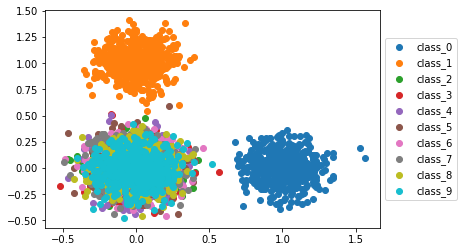

In [4]:
for i in range(10):
    plt.scatter(x[idx[i],0],x[idx[i],1],label="class_"+str(i))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [5]:
mean_x = np.mean(x,axis=0,keepdims=True)
std_x = np.std(x,axis=0,keepdims=True) 
x = ( x - mean_x  )  / std_x

In [6]:
# for i in range(10):
#     plt.scatter(x[idx[i],0],x[idx[i],1],label="class_"+str(i))
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [7]:
# bg_idx = [ np.where(idx[3] == True)[0], 
#           np.where(idx[4] == True)[0], 
#           np.where(idx[5] == True)[0],
#           np.where(idx[6] == True)[0], 
#           np.where(idx[7] == True)[0], 
#           np.where(idx[8] == True)[0],
#           np.where(idx[9] == True)[0]]

# bg_idx = np.concatenate(bg_idx, axis = 0)
# bg_idx.shape

In [8]:
# np.unique(bg_idx).shape

In [9]:
# x = x - np.mean(x[bg_idx], axis = 0, keepdims = True)

In [10]:
# np.mean(x[bg_idx], axis = 0, keepdims = True), np.mean(x, axis = 0, keepdims = True)

In [11]:
# x = x/np.std(x[bg_idx], axis = 0, keepdims = True)

In [12]:
# np.std(x[bg_idx], axis = 0, keepdims = True), np.std(x, axis = 0, keepdims = True)

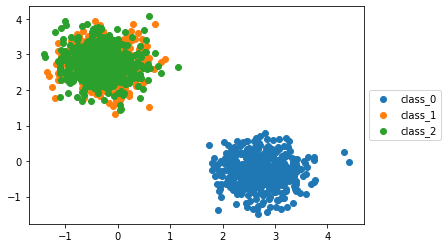

In [13]:
plt.scatter(x[idx[0],0],x[idx[0],1],label="class_"+str(0))
plt.scatter(x[idx[1],0],x[idx[1],1],label="class_"+str(1))
plt.scatter(x[idx[2],1],x[idx[2],2],label="class_"+str(2))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [14]:
foreground_classes = {'class_0','class_1' }

background_classes = {'bg_classes',}

In [15]:
desired_num = 1100  # 2000 + 1000


m = 100



mosaic_list_of_images =[]
mosaic_label = []
fore_idx=[]
for j in tqdm(range(desired_num)):
    np.random.seed(j)
    fg_class  = np.random.randint(0,3)
    fg_idx = np.random.randint(0,m)
    a = []
    for i in range(m):
        if i == fg_idx:
            b = np.random.choice(np.where(idx[fg_class]==True)[0],size=1)
            a.append(x[b])
#             print("foreground "+str(fg_class)+" present at " + str(fg_idx))
        else:
            bg_class = np.random.randint(3,10)
            b = np.random.choice(np.where(idx[bg_class]==True)[0],size=1)
            a.append(x[b])
#             print("background "+str(bg_class)+" present at " + str(i))
    a = np.concatenate(a,axis=0)
    mosaic_list_of_images.append(np.reshape(a,(m,5)))
    mosaic_label.append(fg_class)
    fore_idx.append(fg_idx)

100%|██████████████████████████████████████| 1100/1100 [00:02<00:00, 393.63it/s]


In [16]:
def create_avg_image_from_mosaic_dataset(mosaic_dataset,labels,foreground_index,dataset_number,m):
  """
  mosaic_dataset : mosaic_dataset contains 500 patches dimension 2 each as 1 data point
  labels : mosaic_dataset labels
  foreground_index : contains list of indexes where foreground image is present so that using this we can take weighted average
  dataset_number : will help us to tell what ratio of foreground image to be taken. for eg: if it is "j" then fg_image_ratio = j/500 , bg_image_ratio = (500-j)/499*500
  """
  avg_image_dataset = []
  for i in tqdm(range(len(mosaic_dataset))):
    img = torch.zeros([5], dtype=torch.float64)
    for j in range(m):
      if j == foreground_index[i]:
        img = img + mosaic_dataset[i][j]*dataset_number/(m)
      else :
        img = img + mosaic_dataset[i][j]*(m-dataset_number)/((m-1)*(m))
    
    avg_image_dataset.append(img)
    
  return avg_image_dataset , labels , foreground_index

In [17]:
tr = 100



avg_image_dataset_1 , labels_1,  fg_index_1 = create_avg_image_from_mosaic_dataset(mosaic_list_of_images[0:tr], mosaic_label[0:tr], fore_idx[0:tr] , 1,m)
avg_image_dataset_2 , labels_2,  fg_index_2 = create_avg_image_from_mosaic_dataset(mosaic_list_of_images[0:tr], mosaic_label[0:tr], fore_idx[0:tr] , 10,m)
avg_image_dataset_3 , labels_3,  fg_index_3 = create_avg_image_from_mosaic_dataset(mosaic_list_of_images[0:tr], mosaic_label[0:tr], fore_idx[0:tr] , 20,m)
avg_image_dataset_4 , labels_4,  fg_index_4 = create_avg_image_from_mosaic_dataset(mosaic_list_of_images[0:tr], mosaic_label[0:tr], fore_idx[0:tr] , 30,m )
avg_image_dataset_5 , labels_5,  fg_index_5 = create_avg_image_from_mosaic_dataset(mosaic_list_of_images[0:tr], mosaic_label[0:tr], fore_idx[0:tr] , 40,m)
avg_image_dataset_6 , labels_6,  fg_index_6 = create_avg_image_from_mosaic_dataset(mosaic_list_of_images[0:tr], mosaic_label[0:tr], fore_idx[0:tr] , 50,m)
avg_image_dataset_7 , labels_7,  fg_index_7 = create_avg_image_from_mosaic_dataset(mosaic_list_of_images[0:tr], mosaic_label[0:tr], fore_idx[0:tr] ,60,m)
avg_image_dataset_8 , labels_8,  fg_index_8 = create_avg_image_from_mosaic_dataset(mosaic_list_of_images[0:tr], mosaic_label[0:tr], fore_idx[0:tr] , 70,m)
avg_image_dataset_9 , labels_9,  fg_index_9 = create_avg_image_from_mosaic_dataset(mosaic_list_of_images[0:tr], mosaic_label[0:tr], fore_idx[0:tr] , 80,m)
avg_image_dataset_10 , labels_10,  fg_index_10 = create_avg_image_from_mosaic_dataset(mosaic_list_of_images[0:tr], mosaic_label[0:tr], fore_idx[0:tr] , 80,m)
avg_image_dataset_11 , labels_11,  fg_index_11 = create_avg_image_from_mosaic_dataset(mosaic_list_of_images[0:tr], mosaic_label[0:tr], fore_idx[0:tr] , 100,m)
avg_image_dataset_12 , labels_12,  fg_index_12= create_avg_image_from_mosaic_dataset(mosaic_list_of_images[tr:], mosaic_label[tr:], fore_idx[tr:] , 100,m)

100%|██████████████████████████████████████| 1000/1000 [00:03<00:00, 295.01it/s]


In [18]:
avg_image_dataset_1 = torch.stack(avg_image_dataset_1,dim=0)
avg_image_dataset_2 = torch.stack(avg_image_dataset_2,dim=0)
avg_image_dataset_3 = torch.stack(avg_image_dataset_3,dim=0)
avg_image_dataset_4 = torch.stack(avg_image_dataset_4,dim=0)
avg_image_dataset_5 = torch.stack(avg_image_dataset_5,dim=0)
avg_image_dataset_6 = torch.stack(avg_image_dataset_6,dim=0)
avg_image_dataset_7 = torch.stack(avg_image_dataset_7,dim=0)
avg_image_dataset_8 = torch.stack(avg_image_dataset_8,dim=0)
avg_image_dataset_9 = torch.stack(avg_image_dataset_9,dim=0)
avg_image_dataset_10 = torch.stack(avg_image_dataset_10,dim=0)
avg_image_dataset_11 = torch.stack(avg_image_dataset_11,dim=0)
avg_image_dataset_12 = torch.stack(avg_image_dataset_12,dim=0)

In [19]:
avg_image_dataset_12 = avg_image_dataset_12/m

In [20]:
# plt.figure(figsize=(6,8))
# plt.scatter(avg_image_dataset_1[:,0],avg_image_dataset_1[:,1],c=labels_1)
# plt.title("Dataset 1")


# plt.figure(figsize=(6,8))
# plt.scatter(avg_image_dataset_2[:,0],avg_image_dataset_2[:,1],c=labels_2)
# plt.title("Dataset 2")



# plt.figure(figsize=(6,8))
# plt.scatter(avg_image_dataset_3[:,0],avg_image_dataset_3[:,1],c=labels_3)
# plt.title("Dataset 3")

# plt.figure(figsize=(6,8))
# plt.scatter(avg_image_dataset_4[:,0],avg_image_dataset_4[:,1],c=labels_4)
# plt.title("Dataset 4")

# plt.figure(figsize=(6,8))
# plt.scatter(avg_image_dataset_5[:,0],avg_image_dataset_5[:,1],c=labels_5)
# plt.title("Dataset 5")

# plt.figure(figsize=(6,8))
# plt.scatter(avg_image_dataset_6[:,0],avg_image_dataset_6[:,1],c=labels_6)
# plt.title("Dataset 6")

# plt.figure(figsize=(6,8))
# plt.scatter(avg_image_dataset_7[:,0],avg_image_dataset_7[:,1],c=labels_7)
# plt.title("Dataset 7")

# plt.figure(figsize=(6,8))
# plt.scatter(avg_image_dataset_8[:,0],avg_image_dataset_8[:,1],c=labels_8)
# plt.title("Dataset 8")

# plt.figure(figsize=(6,8))
# plt.scatter(avg_image_dataset_9[:,0],avg_image_dataset_9[:,1],c=labels_9)
# plt.title("Dataset 9")

# plt.figure(figsize=(6,8))
# plt.scatter(avg_image_dataset_10[:,0],avg_image_dataset_10[:,1],c=labels_10)
# plt.title("Dataset 10")


# plt.figure(figsize=(6,8))
# plt.scatter(avg_image_dataset_11[:,0],avg_image_dataset_11[:,1],c=labels_11)
# plt.title("Dataset 11")


# plt.figure(figsize=(6,8))
# plt.scatter(avg_image_dataset_12[:,0],avg_image_dataset_12[:,1],c=labels_12)
# plt.title("Dataset 12")


# plt.figure(figsize=(6,8))
# plt.scatter(avg_image_dataset_13[:,0],avg_image_dataset_13[:,1],c=labels_13)
# plt.title("Dataset 13")


# plt.figure(figsize=(6,8))
# plt.scatter(avg_image_dataset_14[:,0],avg_image_dataset_14[:,1],c=labels_14)
# plt.title("Dataset 14")


In [21]:
class MosaicDataset(Dataset):
  """MosaicDataset dataset."""

  def __init__(self, mosaic_list_of_images, mosaic_label):
    """
      Args:
        csv_file (string): Path to the csv file with annotations.
        root_dir (string): Directory with all the images.
        transform (callable, optional): Optional transform to be applied
            on a sample.
    """
    self.mosaic = mosaic_list_of_images
    self.label = mosaic_label
    #self.fore_idx = fore_idx
    
  def __len__(self):
    return len(self.label)

  def __getitem__(self, idx):
    return self.mosaic[idx] , self.label[idx] #, self.fore_idx[idx]

In [22]:
batch = 256


# training_data = avg_image_dataset_5    #just change this and training_label to desired dataset for training
# training_label = labels_5

traindata_1 = MosaicDataset(avg_image_dataset_1, labels_1 )
trainloader_1 = DataLoader( traindata_1 , batch_size= batch ,shuffle=True)

traindata_2 = MosaicDataset(avg_image_dataset_2, labels_2 )
trainloader_2 = DataLoader( traindata_2 , batch_size= batch ,shuffle=True)

traindata_3 = MosaicDataset(avg_image_dataset_3, labels_3 )
trainloader_3 = DataLoader( traindata_3 , batch_size= batch ,shuffle=True)

traindata_4 = MosaicDataset(avg_image_dataset_4, labels_4 )
trainloader_4 = DataLoader( traindata_4 , batch_size= batch ,shuffle=True)

traindata_5 = MosaicDataset(avg_image_dataset_5, labels_5 )
trainloader_5 = DataLoader( traindata_5 , batch_size= batch ,shuffle=True)

traindata_6 = MosaicDataset(avg_image_dataset_6, labels_6 )
trainloader_6 = DataLoader( traindata_6 , batch_size= batch ,shuffle=True)

traindata_7 = MosaicDataset(avg_image_dataset_7, labels_7 )
trainloader_7 = DataLoader( traindata_7 , batch_size= batch ,shuffle=True)

traindata_8 = MosaicDataset(avg_image_dataset_8, labels_8 )
trainloader_8 = DataLoader( traindata_8 , batch_size= batch ,shuffle=True)

traindata_9 = MosaicDataset(avg_image_dataset_9, labels_9 )
trainloader_9 = DataLoader( traindata_9 , batch_size= batch ,shuffle=True)


traindata_10 = MosaicDataset(avg_image_dataset_10, labels_10 )
trainloader_10 = DataLoader( traindata_10 , batch_size= batch ,shuffle=True)

traindata_11 = MosaicDataset(avg_image_dataset_11, labels_11 )
trainloader_11 = DataLoader( traindata_11, batch_size= batch ,shuffle=True)



testdata_1 = MosaicDataset(avg_image_dataset_1, labels_1 )
testloader_1 = DataLoader( testdata_1 , batch_size= batch ,shuffle=False)

testdata_2 = MosaicDataset(avg_image_dataset_2, labels_2 )
testloader_2 = DataLoader( testdata_2 , batch_size= batch ,shuffle=False)

testdata_3 = MosaicDataset(avg_image_dataset_3, labels_3 )
testloader_3 = DataLoader( testdata_3 , batch_size= batch ,shuffle=False)

testdata_4 = MosaicDataset(avg_image_dataset_4, labels_4 )
testloader_4 = DataLoader( testdata_4 , batch_size= batch ,shuffle=False)

testdata_5 = MosaicDataset(avg_image_dataset_5, labels_5 )
testloader_5 = DataLoader( testdata_5 , batch_size= batch ,shuffle=False)

testdata_6 = MosaicDataset(avg_image_dataset_6, labels_6 )
testloader_6 = DataLoader( testdata_6 , batch_size= batch ,shuffle=False)

testdata_7 = MosaicDataset(avg_image_dataset_7, labels_7 )
testloader_7 = DataLoader( testdata_7 , batch_size= batch ,shuffle=False)

testdata_8 = MosaicDataset(avg_image_dataset_8, labels_8 )
testloader_8 = DataLoader( testdata_8 , batch_size= batch ,shuffle=False)

testdata_9 = MosaicDataset(avg_image_dataset_9, labels_9 )
testloader_9 = DataLoader( testdata_9 , batch_size= batch ,shuffle=False)

testdata_10 = MosaicDataset(avg_image_dataset_10, labels_10 )
testloader_10 = DataLoader( testdata_10 , batch_size= batch ,shuffle=False)


testdata_11 = MosaicDataset(avg_image_dataset_11, labels_11)
testloader_11 = DataLoader( testdata_11 , batch_size= batch ,shuffle=False)


testdata_12 = MosaicDataset(avg_image_dataset_12, labels_12)
testloader_12 = DataLoader( testdata_12 , batch_size= batch ,shuffle=False)

In [23]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(5, 3)
    torch.nn.init.xavier_normal_(self.fc1.weight)
    torch.nn.init.zeros_(self.fc1.bias)
  def forward(self, x):
    x = self.fc1(x)
    # print(x.shape)
    return x

In [24]:
torch.manual_seed(12)
net = Net()

In [25]:
for params in net.parameters():
    print(params)

Parameter containing:
tensor([[ 0.4055,  0.0120, -0.0452,  0.8600, -0.5742],
        [ 0.4041, -0.6415,  0.1186,  0.2583,  0.0892],
        [ 0.5539,  0.7417, -0.8079, -0.7441,  0.5195]], requires_grad=True)
Parameter containing:
tensor([0., 0., 0.], requires_grad=True)


In [26]:
def test_all(number, testloader,net):
    correct = 0
    total = 0
    out = []
    pred = []
    net.eval()
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device),labels.to(device)
            out.append(labels.cpu().numpy())
            outputs= net(images)
            _, predicted = torch.max(outputs.data, 1)
            pred.append(predicted.cpu().numpy())
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the test dataset %d: %d %%' % (number , 100 * correct / total))

In [27]:
def train_all(trainloader, ds_number, testloader_list):
    
    print("--"*40)
    print("training on data set  ", ds_number)
    torch.manual_seed(12)
    net = Net().double()
    net = net.to(device)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=0.01)#, momentum=0.9)
    
    acti = []
    loss_curi = []
    epochs = 300
    
    for epoch in range(epochs): # loop over the dataset multiple times
        ep_lossi = []

        running_loss = 0.0
        if epoch ==0:
            with torch.no_grad():
                for k, data in enumerate(trainloader, 0):
                    inputs, labels = data
                    inputs, labels = inputs.to(device),labels.to(device)
                    outputs = net(inputs)
                    loss = criterion(outputs, labels)
                    running_loss += loss.item()
                    if k+1 ==8:
                        ep_lossi.append(running_loss/(k+1))
                        print('[%d, %5d] loss: %.3f' %(epoch, k+ 1, running_loss/(k+1) ))
                        running_loss = 0.0  
                loss_curi.append(np.mean(ep_lossi))
                ep_lossi = [] 
        
        
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data
            inputs, labels = inputs.to(device),labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            mini = 1
            if i % mini == (mini-1):    
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / ( mini ) ))
                ep_lossi.append(running_loss/ (mini) ) # loss per minibatch
                running_loss = 0.0
                
        loss_curi.append(np.mean(ep_lossi))   #loss per epoch
    print('Finished Training')
    torch.save(net.state_dict(),"train_dataset_"+str(ds_number)+"_"+str(epochs)+".pt")
    
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the train images: %d %%' % (  100 * correct / total))
    
    for i, j in enumerate(testloader_list):
        test_all(i+1, j,net)
    
    print("--"*40)
    
    return loss_curi


In [28]:
train_loss_all=[]

testloader_list= [ testloader_1, testloader_2, testloader_3, testloader_4, testloader_5, testloader_6,
                 testloader_7, testloader_8, testloader_9, testloader_10,testloader_11,testloader_12]

train_loss_all.append(train_all(trainloader_1, 1, testloader_list))
train_loss_all.append(train_all(trainloader_2, 2, testloader_list))
train_loss_all.append(train_all(trainloader_3, 3, testloader_list))
train_loss_all.append(train_all(trainloader_4, 4, testloader_list))
train_loss_all.append(train_all(trainloader_5, 5, testloader_list))
train_loss_all.append(train_all(trainloader_6, 6, testloader_list))
train_loss_all.append(train_all(trainloader_7, 7, testloader_list))
train_loss_all.append(train_all(trainloader_8, 8, testloader_list))
train_loss_all.append(train_all(trainloader_9, 9, testloader_list))
train_loss_all.append(train_all(trainloader_10, 10, testloader_list))
train_loss_all.append(train_all(trainloader_11, 11, testloader_list))

--------------------------------------------------------------------------------
training on data set   1
[1,     1] loss: 2.223
[2,     1] loss: 1.109
[3,     1] loss: 1.107
[4,     1] loss: 1.105
[5,     1] loss: 1.103
[6,     1] loss: 1.102
[7,     1] loss: 1.101
[8,     1] loss: 1.100
[9,     1] loss: 1.099
[10,     1] loss: 1.099
[11,     1] loss: 1.098
[12,     1] loss: 1.098
[13,     1] loss: 1.097
[14,     1] loss: 1.097
[15,     1] loss: 1.097
[16,     1] loss: 1.096
[17,     1] loss: 1.096
[18,     1] loss: 1.095
[19,     1] loss: 1.095
[20,     1] loss: 1.095
[21,     1] loss: 1.094
[22,     1] loss: 1.094
[23,     1] loss: 1.093
[24,     1] loss: 1.093
[25,     1] loss: 1.092
[26,     1] loss: 1.092
[27,     1] loss: 1.091
[28,     1] loss: 1.091
[29,     1] loss: 1.090
[30,     1] loss: 1.090
[31,     1] loss: 1.089
[32,     1] loss: 1.089
[33,     1] loss: 1.088
[34,     1] loss: 1.088
[35,     1] loss: 1.087
[36,     1] loss: 1.087
[37,     1] loss: 1.087
[38,     1] los

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[4,     1] loss: 1.233
[5,     1] loss: 1.227
[6,     1] loss: 1.222
[7,     1] loss: 1.217
[8,     1] loss: 1.212
[9,     1] loss: 1.206
[10,     1] loss: 1.201
[11,     1] loss: 1.196
[12,     1] loss: 1.191
[13,     1] loss: 1.187
[14,     1] loss: 1.182
[15,     1] loss: 1.177
[16,     1] loss: 1.172
[17,     1] loss: 1.168
[18,     1] loss: 1.163
[19,     1] loss: 1.159
[20,     1] loss: 1.154
[21,     1] loss: 1.150
[22,     1] loss: 1.146
[23,     1] loss: 1.141
[24,     1] loss: 1.137
[25,     1] loss: 1.133
[26,     1] loss: 1.129
[27,     1] loss: 1.125
[28,     1] loss: 1.120
[29,     1] loss: 1.116
[30,     1] loss: 1.112
[31,     1] loss: 1.108
[32,     1] loss: 1.104
[33,     1] loss: 1.100
[34,     1] loss: 1.096
[35,     1] loss: 1.091
[36,     1] loss: 1.087
[37,     1] loss: 1.083
[38,     1] loss: 1.079
[39,     1] loss: 1.075
[40,     1] loss: 1.071
[41,     1] loss: 1.067
[42,     1] loss: 1.063
[43,     1] loss: 1.059
[44,     1] loss: 1.055
[45,     1] loss: 1.05

[31,     1] loss: 1.143
[32,     1] loss: 1.134
[33,     1] loss: 1.126
[34,     1] loss: 1.118
[35,     1] loss: 1.110
[36,     1] loss: 1.102
[37,     1] loss: 1.094
[38,     1] loss: 1.086
[39,     1] loss: 1.078
[40,     1] loss: 1.071
[41,     1] loss: 1.063
[42,     1] loss: 1.055
[43,     1] loss: 1.048
[44,     1] loss: 1.040
[45,     1] loss: 1.032
[46,     1] loss: 1.025
[47,     1] loss: 1.017
[48,     1] loss: 1.010
[49,     1] loss: 1.003
[50,     1] loss: 0.995
[51,     1] loss: 0.988
[52,     1] loss: 0.981
[53,     1] loss: 0.974
[54,     1] loss: 0.967
[55,     1] loss: 0.960
[56,     1] loss: 0.953
[57,     1] loss: 0.946
[58,     1] loss: 0.939
[59,     1] loss: 0.932
[60,     1] loss: 0.925
[61,     1] loss: 0.919
[62,     1] loss: 0.912
[63,     1] loss: 0.905
[64,     1] loss: 0.899
[65,     1] loss: 0.892
[66,     1] loss: 0.886
[67,     1] loss: 0.879
[68,     1] loss: 0.873
[69,     1] loss: 0.867
[70,     1] loss: 0.860
[71,     1] loss: 0.854
[72,     1] loss

[78,     1] loss: 0.719
[79,     1] loss: 0.711
[80,     1] loss: 0.704
[81,     1] loss: 0.697
[82,     1] loss: 0.689
[83,     1] loss: 0.682
[84,     1] loss: 0.675
[85,     1] loss: 0.668
[86,     1] loss: 0.661
[87,     1] loss: 0.655
[88,     1] loss: 0.648
[89,     1] loss: 0.641
[90,     1] loss: 0.635
[91,     1] loss: 0.628
[92,     1] loss: 0.622
[93,     1] loss: 0.616
[94,     1] loss: 0.610
[95,     1] loss: 0.604
[96,     1] loss: 0.598
[97,     1] loss: 0.592
[98,     1] loss: 0.586
[99,     1] loss: 0.580
[100,     1] loss: 0.574
[101,     1] loss: 0.569
[102,     1] loss: 0.563
[103,     1] loss: 0.557
[104,     1] loss: 0.552
[105,     1] loss: 0.547
[106,     1] loss: 0.541
[107,     1] loss: 0.536
[108,     1] loss: 0.531
[109,     1] loss: 0.526
[110,     1] loss: 0.521
[111,     1] loss: 0.516
[112,     1] loss: 0.511
[113,     1] loss: 0.506
[114,     1] loss: 0.501
[115,     1] loss: 0.497
[116,     1] loss: 0.492
[117,     1] loss: 0.488
[118,     1] loss: 0.4

[106,     1] loss: 0.452
[107,     1] loss: 0.446
[108,     1] loss: 0.441
[109,     1] loss: 0.436
[110,     1] loss: 0.431
[111,     1] loss: 0.426
[112,     1] loss: 0.421
[113,     1] loss: 0.416
[114,     1] loss: 0.411
[115,     1] loss: 0.407
[116,     1] loss: 0.402
[117,     1] loss: 0.398
[118,     1] loss: 0.393
[119,     1] loss: 0.389
[120,     1] loss: 0.385
[121,     1] loss: 0.380
[122,     1] loss: 0.376
[123,     1] loss: 0.372
[124,     1] loss: 0.368
[125,     1] loss: 0.364
[126,     1] loss: 0.360
[127,     1] loss: 0.356
[128,     1] loss: 0.353
[129,     1] loss: 0.349
[130,     1] loss: 0.345
[131,     1] loss: 0.342
[132,     1] loss: 0.338
[133,     1] loss: 0.335
[134,     1] loss: 0.331
[135,     1] loss: 0.328
[136,     1] loss: 0.325
[137,     1] loss: 0.321
[138,     1] loss: 0.318
[139,     1] loss: 0.315
[140,     1] loss: 0.312
[141,     1] loss: 0.309
[142,     1] loss: 0.306
[143,     1] loss: 0.303
[144,     1] loss: 0.300
[145,     1] loss: 0.297


[156,     1] loss: 0.216
[157,     1] loss: 0.214
[158,     1] loss: 0.212
[159,     1] loss: 0.210
[160,     1] loss: 0.208
[161,     1] loss: 0.206
[162,     1] loss: 0.204
[163,     1] loss: 0.202
[164,     1] loss: 0.200
[165,     1] loss: 0.198
[166,     1] loss: 0.196
[167,     1] loss: 0.194
[168,     1] loss: 0.193
[169,     1] loss: 0.191
[170,     1] loss: 0.189
[171,     1] loss: 0.188
[172,     1] loss: 0.186
[173,     1] loss: 0.184
[174,     1] loss: 0.183
[175,     1] loss: 0.181
[176,     1] loss: 0.180
[177,     1] loss: 0.178
[178,     1] loss: 0.176
[179,     1] loss: 0.175
[180,     1] loss: 0.173
[181,     1] loss: 0.172
[182,     1] loss: 0.171
[183,     1] loss: 0.169
[184,     1] loss: 0.168
[185,     1] loss: 0.166
[186,     1] loss: 0.165
[187,     1] loss: 0.164
[188,     1] loss: 0.162
[189,     1] loss: 0.161
[190,     1] loss: 0.160
[191,     1] loss: 0.158
[192,     1] loss: 0.157
[193,     1] loss: 0.156
[194,     1] loss: 0.155
[195,     1] loss: 0.154


[205,     1] loss: 0.117
[206,     1] loss: 0.116
[207,     1] loss: 0.115
[208,     1] loss: 0.114
[209,     1] loss: 0.113
[210,     1] loss: 0.113
[211,     1] loss: 0.112
[212,     1] loss: 0.111
[213,     1] loss: 0.110
[214,     1] loss: 0.109
[215,     1] loss: 0.109
[216,     1] loss: 0.108
[217,     1] loss: 0.107
[218,     1] loss: 0.106
[219,     1] loss: 0.106
[220,     1] loss: 0.105
[221,     1] loss: 0.104
[222,     1] loss: 0.103
[223,     1] loss: 0.103
[224,     1] loss: 0.102
[225,     1] loss: 0.101
[226,     1] loss: 0.101
[227,     1] loss: 0.100
[228,     1] loss: 0.099
[229,     1] loss: 0.099
[230,     1] loss: 0.098
[231,     1] loss: 0.097
[232,     1] loss: 0.097
[233,     1] loss: 0.096
[234,     1] loss: 0.095
[235,     1] loss: 0.095
[236,     1] loss: 0.094
[237,     1] loss: 0.093
[238,     1] loss: 0.093
[239,     1] loss: 0.092
[240,     1] loss: 0.092
[241,     1] loss: 0.091
[242,     1] loss: 0.090
[243,     1] loss: 0.090
[244,     1] loss: 0.089


[254,     1] loss: 0.071
[255,     1] loss: 0.070
[256,     1] loss: 0.070
[257,     1] loss: 0.070
[258,     1] loss: 0.069
[259,     1] loss: 0.069
[260,     1] loss: 0.068
[261,     1] loss: 0.068
[262,     1] loss: 0.068
[263,     1] loss: 0.067
[264,     1] loss: 0.067
[265,     1] loss: 0.066
[266,     1] loss: 0.066
[267,     1] loss: 0.066
[268,     1] loss: 0.065
[269,     1] loss: 0.065
[270,     1] loss: 0.065
[271,     1] loss: 0.064
[272,     1] loss: 0.064
[273,     1] loss: 0.063
[274,     1] loss: 0.063
[275,     1] loss: 0.063
[276,     1] loss: 0.062
[277,     1] loss: 0.062
[278,     1] loss: 0.062
[279,     1] loss: 0.061
[280,     1] loss: 0.061
[281,     1] loss: 0.061
[282,     1] loss: 0.060
[283,     1] loss: 0.060
[284,     1] loss: 0.060
[285,     1] loss: 0.059
[286,     1] loss: 0.059
[287,     1] loss: 0.059
[288,     1] loss: 0.059
[289,     1] loss: 0.058
[290,     1] loss: 0.058
[291,     1] loss: 0.058
[292,     1] loss: 0.057
[293,     1] loss: 0.057


[292,     1] loss: 0.050
[293,     1] loss: 0.049
[294,     1] loss: 0.049
[295,     1] loss: 0.049
[296,     1] loss: 0.049
[297,     1] loss: 0.048
[298,     1] loss: 0.048
[299,     1] loss: 0.048
[300,     1] loss: 0.048
Finished Training
Accuracy of the network on the train images: 100 %
Accuracy of the network on the test dataset 1: 35 %
Accuracy of the network on the test dataset 2: 56 %
Accuracy of the network on the test dataset 3: 95 %
Accuracy of the network on the test dataset 4: 100 %
Accuracy of the network on the test dataset 5: 100 %
Accuracy of the network on the test dataset 6: 100 %
Accuracy of the network on the test dataset 7: 100 %
Accuracy of the network on the test dataset 8: 100 %
Accuracy of the network on the test dataset 9: 100 %
Accuracy of the network on the test dataset 10: 100 %
Accuracy of the network on the test dataset 11: 100 %
Accuracy of the network on the test dataset 12: 35 %
-----------------------------------------------------------------------

[5,     1] loss: 2.972
[6,     1] loss: 2.916
[7,     1] loss: 2.861
[8,     1] loss: 2.807
[9,     1] loss: 2.753
[10,     1] loss: 2.699
[11,     1] loss: 2.645
[12,     1] loss: 2.592
[13,     1] loss: 2.539
[14,     1] loss: 2.487
[15,     1] loss: 2.435
[16,     1] loss: 2.383
[17,     1] loss: 2.332
[18,     1] loss: 2.281
[19,     1] loss: 2.231
[20,     1] loss: 2.181
[21,     1] loss: 2.131
[22,     1] loss: 2.082
[23,     1] loss: 2.034
[24,     1] loss: 1.986
[25,     1] loss: 1.938
[26,     1] loss: 1.891
[27,     1] loss: 1.844
[28,     1] loss: 1.798
[29,     1] loss: 1.752
[30,     1] loss: 1.707
[31,     1] loss: 1.663
[32,     1] loss: 1.619
[33,     1] loss: 1.576
[34,     1] loss: 1.533
[35,     1] loss: 1.491
[36,     1] loss: 1.450
[37,     1] loss: 1.409
[38,     1] loss: 1.369
[39,     1] loss: 1.330
[40,     1] loss: 1.291
[41,     1] loss: 1.253
[42,     1] loss: 1.216
[43,     1] loss: 1.180
[44,     1] loss: 1.144
[45,     1] loss: 1.109
[46,     1] loss: 1.0

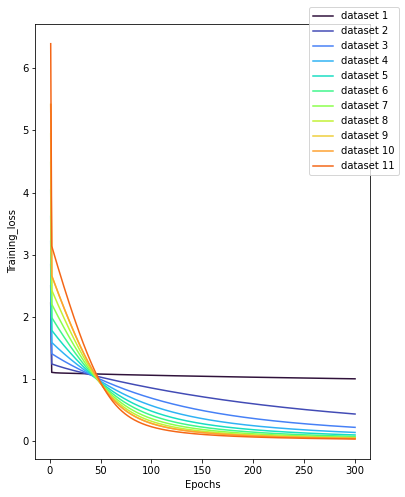

In [29]:
cm = plt.get_cmap('turbo')
fig = plt.figure(figsize=(6,8))
for i,j in enumerate(train_loss_all):
    plt.plot(j,label ="dataset "+str(i+1),color = cm(i*20))

plt.xlabel("Epochs")
plt.ylabel("Training_loss")

plt.legend(bbox_to_anchor=(1.1, 1.05))